In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split

C:\Users\shash\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
 from pandas.core.computation.check import NUMEXPR_INSTALLED

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [4]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [7]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

Data Analysis

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


This will give us the number of the value in each columns, mix, max valus and the percentile which will help us to get the statiscal data for the analysis

In [14]:
%matplotlib inline

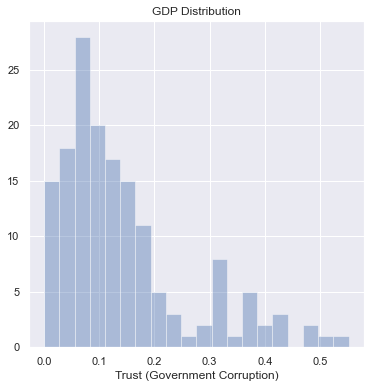

In [28]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['Trust (Government Corruption)'], kde=False, bins=20)
plt.title('GDP Distribution')
plt.show()

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

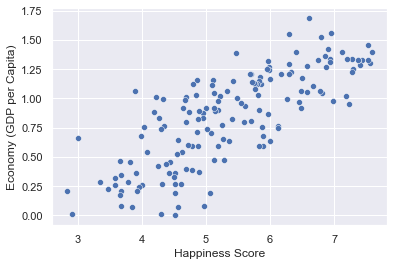

In [39]:
sns.scatterplot(data=df,x='Happiness Score', y='Economy (GDP per Capita)')

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

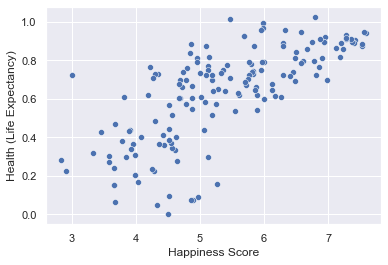

In [34]:
sns.scatterplot(data=df,x='Happiness Score', y='Health (Life Expectancy)')

<AxesSubplot:xlabel='Happiness Score', ylabel='Generosity'>

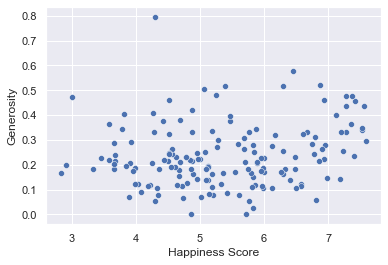

In [35]:
sns.scatterplot(data=df,x='Happiness Score', y='Generosity')

<AxesSubplot:xlabel='Happiness Score', ylabel='Trust (Government Corruption)'>

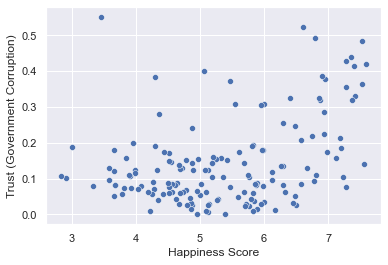

In [36]:
sns.scatterplot(data=df,x='Happiness Score',y='Trust (Government Corruption)')

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

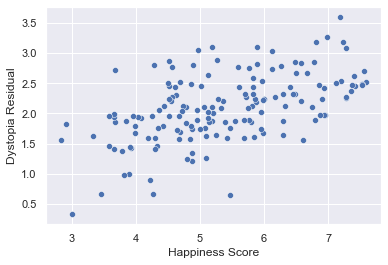

In [37]:
sns.scatterplot(data=df,x='Happiness Score',y='Dystopia Residual')

<AxesSubplot:xlabel='Happiness Score', ylabel='Standard Error'>

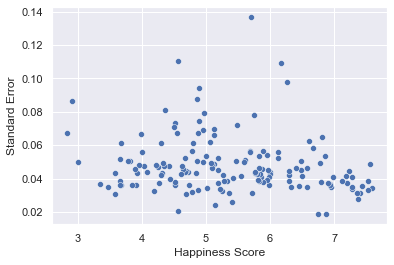

In [38]:
sns.scatterplot(data=df,x='Happiness Score' ,y='Standard Error')

Text(0, 0.5, 'Economy (GDP per Capita)')

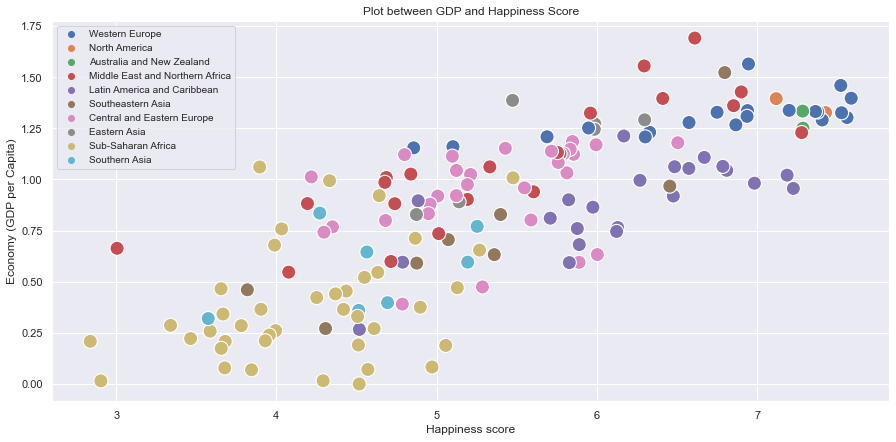

In [50]:
plt.figure(figsize=(15,7))
plt.title('Plot between GDP and Happiness Score')
sns.scatterplot(data=df,x='Happiness Score', y='Economy (GDP per Capita)', hue=df.Region, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Happiness score')
plt.ylabel('Economy (GDP per Capita)')

According to this we can see that the country whic has low GDP has low happiness score as well and vice versa.

In [63]:
#Regional GDP:
gdp_regn=df.groupby('Region')['Economy (GDP per Capita)'].sum()
gdp_regn

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: Economy (GDP per Capita), dtype: float64

Text(0, 0.5, '')

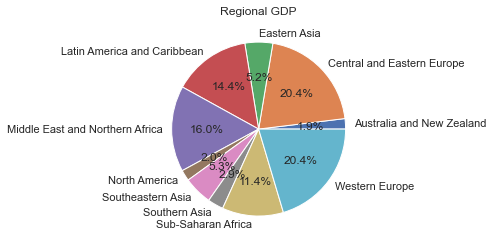

In [65]:
gdp_regn.plot.pie(autopct= '%1.1f%%')
plt.title('Regional GDP')
plt.ylabel('')

In [69]:
#Total countries in all region
total_count=df.groupby('Region')['Country'].count()
total_count

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
Name: Country, dtype: int64

<AxesSubplot:>

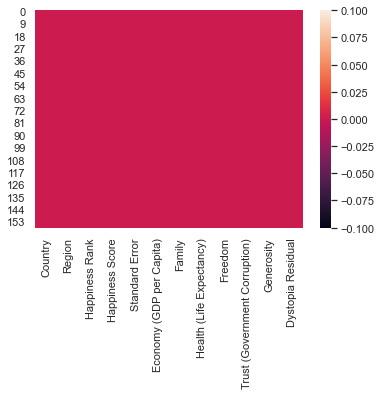

In [70]:
sns.heatmap(df.isnull())

In [80]:
new_df=df.drop(['Country', 'Region'], axis=1)

In [81]:
new_df

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...
153,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [82]:
correlation=new_df.corr()

In [83]:
correlation

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,-0.521999,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


<AxesSubplot:>

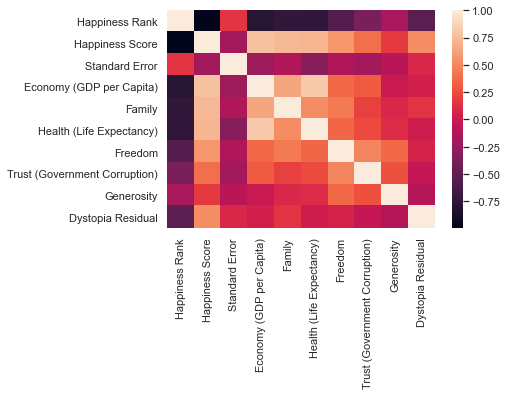

In [85]:
sns.heatmap(correlation)

<AxesSubplot:>

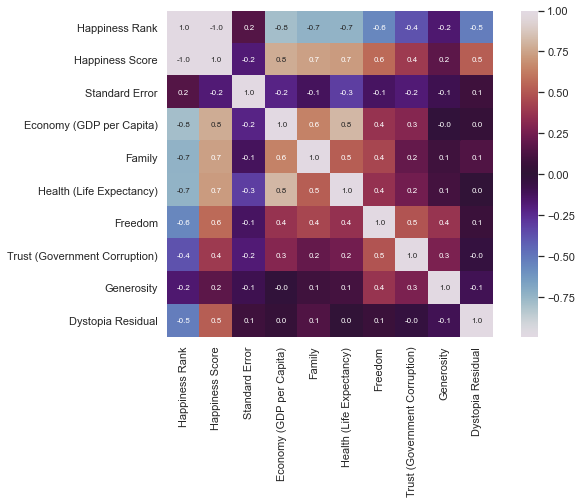

In [87]:
plt.figure(figsize=(10,6))
sns.heatmap(correlation, cbar=True, square=True, fmt= '.1f', annot = True, annot_kws={'size':8}, cmap='twilight')

In [89]:
#Goverment Corruption in different region
corrup=df.groupby('Region')['Trust (Government Corruption)'].mean()
corrup

Region
Australia and New Zealand          0.392795
Central and Eastern Europe         0.086674
Eastern Asia                       0.127695
Latin America and Caribbean        0.117172
Middle East and Northern Africa    0.181702
North America                      0.244235
Southeastern Asia                  0.151276
Southern Asia                      0.102536
Sub-Saharan Africa                 0.123878
Western Europe                     0.231463
Name: Trust (Government Corruption), dtype: float64

<AxesSubplot:xlabel='Region', ylabel='Trust (Government Corruption)'>

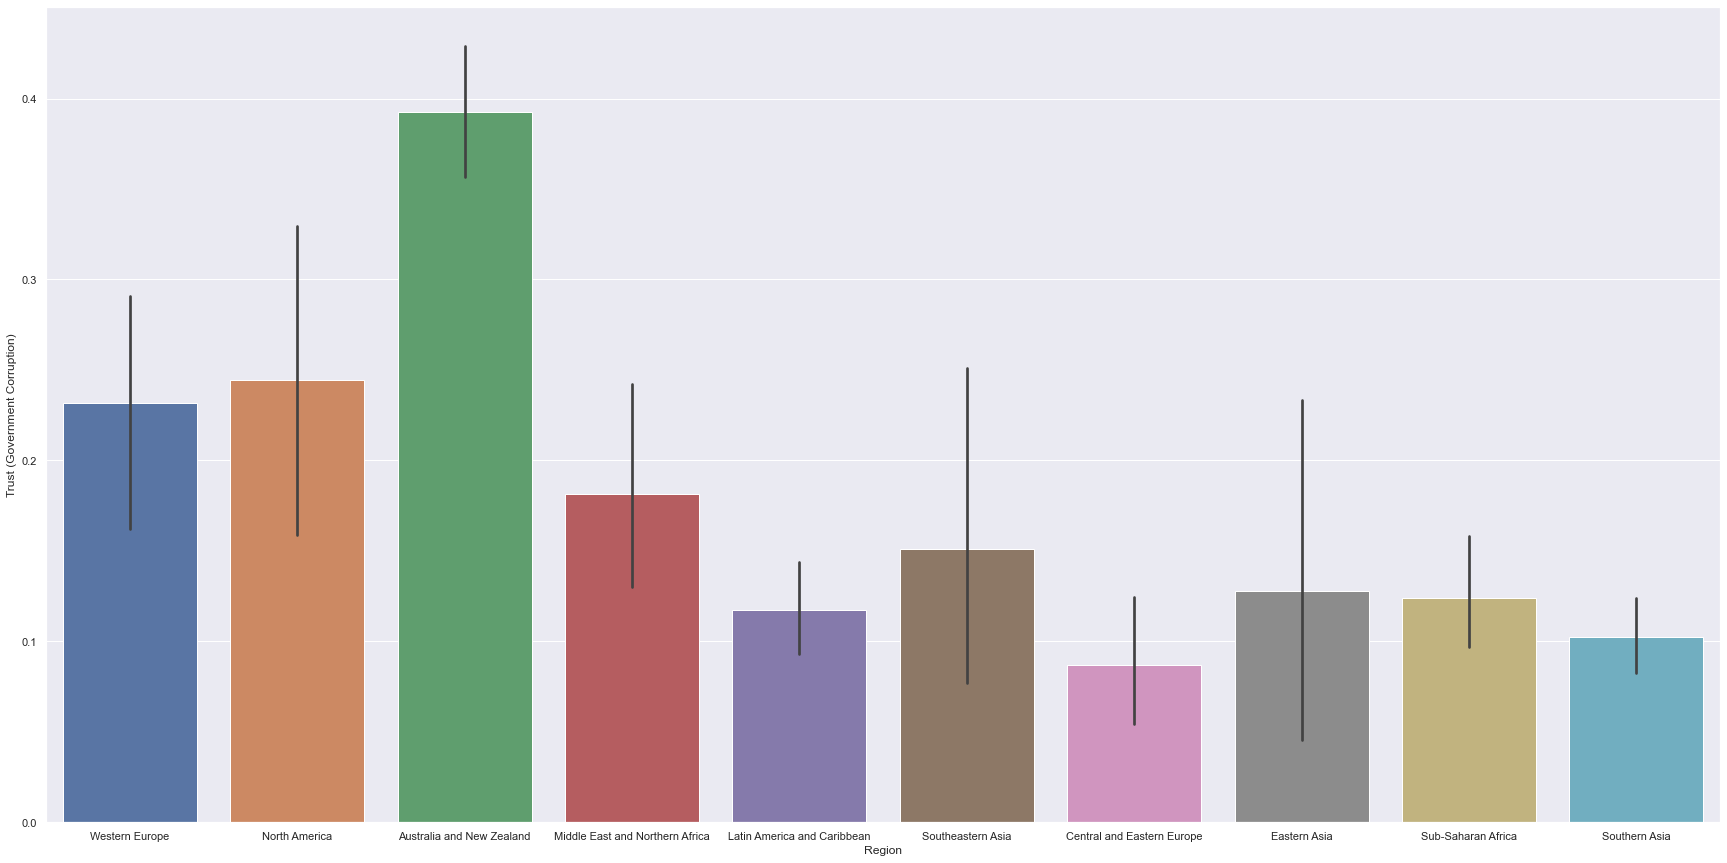

In [101]:
plot= plt.figure(figsize=(30,15))
sns.barplot(x='Region', y ='Trust (Government Corruption)', data=df)

<AxesSubplot:xlabel='Happiness Score', ylabel='Dystopia Residual'>

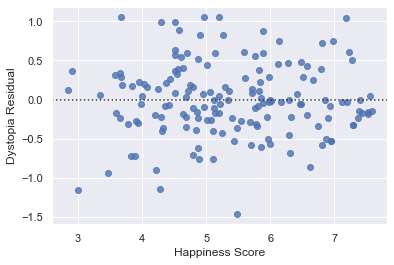

In [119]:
sns.residplot(data=df, x="Happiness Score", y="Dystopia Residual")

Text(0, 0.5, 'Happiness Score')

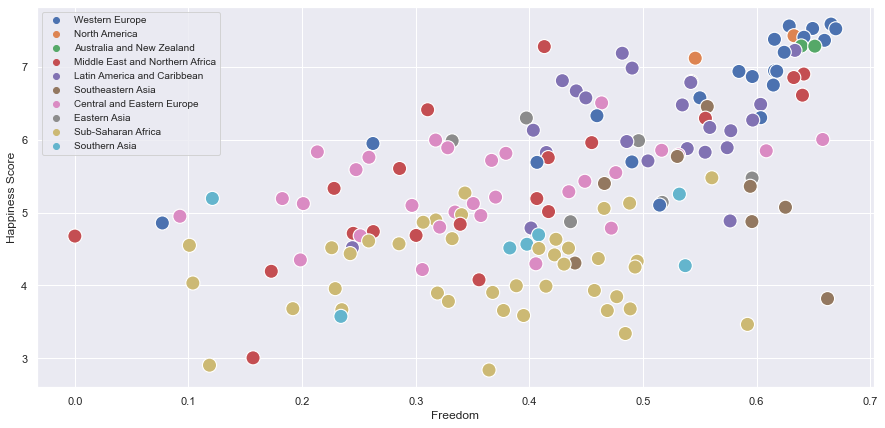

In [123]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=df,x='Freedom', y='Happiness Score', hue=df.Region, s=200)
plt.legend(loc='upper left', fontsize='10')
plt.xlabel('Freedom')
plt.ylabel('Happiness Score')

As we can see here that the hapiness score is less in the region where freedom value is low, like the sub saharan Africa. 

In [124]:
from sklearn  import preprocessing

In [125]:
la=preprocessing.LabelEncoder()

In [126]:
df['Country']=la.fit_transform(df['Country'])

In [128]:
df['Region']=la.fit_transform(df['Region'])

In [129]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,118,8,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,136,4,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,21,8,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [130]:
from scipy .stats import zscore

In [131]:
z=np.abs(zscore(df))
z

array([[1.23877001, 1.30025593, 1.72099989, ..., 2.30965159, 0.47103971,
        0.75825809],
       [0.44946522, 1.30025593, 1.69907456, ..., 0.01647953, 1.57585637,
        1.09285682],
       [0.90989302, 1.30025593, 1.67714922, ..., 2.8427738 , 0.8242928 ,
        0.71233526],
       ...,
       [1.26069514, 0.37544095, 1.67742676, ..., 0.38141902, 1.85689094,
        3.20843049],
       [1.26069514, 0.96511655, 1.69935209, ..., 0.35771452, 0.31694987,
        0.48198451],
       [1.37032081, 0.96511655, 1.72127743, ..., 0.30180313, 0.5581534 ,
        0.96361241]])

In [132]:
threshold=3
print(np.where(z>3))

(array([ 27,  40,  64, 115, 128, 147, 153, 155, 157], dtype=int64), array([ 9,  4,  4,  4, 10,  6,  9, 11,  6], dtype=int64))


In [133]:
z[27][9]

3.1646194851713774

In [134]:
z[40][4]

3.5727739331415806

In [135]:
z[64][4]

5.209813157066768

In [136]:
z[115][4]

3.673991869431451

In [137]:
z[128][10]

4.423261580434631

In [138]:
z[147][6]

3.65018347485875

In [139]:
z[153][9]

3.4139224398643333

In [140]:
z[155][11]

3.2084304855119403

In [141]:
z[157][6]

3.1347248549706186

In [143]:
hf=df[(z<3).all(axis=1)]
hf

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [144]:
df.shape

(158, 12)

In [145]:
hf.shape

(149, 12)

In [146]:
happi_s=pd.DataFrame(hf['Happiness Score'])

In [147]:
happi_s

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


In [148]:
y=happi_s
y

,Happiness Score
0,7.587
1,7.561
2,7.527
3,7.522
4,7.427
...,...
150,3.655
151,3.587
152,3.575
154,3.340


In [149]:
happi_dt=pd.DataFrame(hf)

In [150]:
x=happi_dt
x

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,58,9,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,37,9,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,105,9,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,24,5,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
150,66,8,151,3.655,0.05141,0.46534,0.77115,0.15185,0.46866,0.17922,0.20165,1.41723
151,20,8,152,3.587,0.04324,0.25812,0.85188,0.27125,0.39493,0.12832,0.21747,1.46494
152,0,7,153,3.575,0.03084,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210
154,13,8,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328


In [152]:
x.shape

(149, 12)

In [153]:
y.shape

(149, 1)

In [154]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=53)

In [155]:
regressor=LinearRegression()

In [156]:
regressor.fit(x_train, y_train)

LinearRegression()

In [157]:
training_data_prediction=regressor.predict(x_train)

In [159]:
from sklearn import metrics

In [160]:
r2_train= metrics.r2_score(y_train, training_data_prediction)
print('Squared Value:' ,r2_train)

Squared Value: 1.0


In [180]:
y_pred =regressor.predict(x_test)

In [182]:
from sklearn.metrics import r2_score

In [183]:
ms = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", ms)
print("R-squared:", r2)

Mean Squared Error: 4.0429121392576855e-30
R-squared: 1.0


In [184]:
from sklearn.linear_model import Lasso,Ridge

In [185]:
ls=Lasso(alpha=0.0001)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)

0.9999976188037336

In [186]:
rd=Ridge(alpha=0.0001)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)

0.9999999990978833